In [343]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [344]:
# Reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [345]:
# Reflect the tables
Base.prepare(engine, reflect=True)

In [346]:
# Save reference to a table
Measurement = Base.classes.measurement

In [347]:
# Create a session from python to the database
session = Session(engine)

In [348]:
# Create a query to retrieve date, precipitation and temperature scores
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)

In [349]:
# Add the results to a dataframe
df = pd.DataFrame(results, columns=["Date","Precipitation", "Temperature Observations"])

In [350]:
# Create a new dataframe for June
june_df = df[df["Date"].str.contains(r"\d{4}-06-\d{2}")]

In [351]:
# Create a new dataframe for December
december_df = df[df["Date"].str.contains(r"\d{4}-12-\d{2}")]

In [352]:
# Print statistical information for June
june_df.describe()

,Precipitation,Temperature Observations
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [353]:
# Print statistical inforamtion for December
december_df.describe()

,Precipitation,Temperature Observations
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


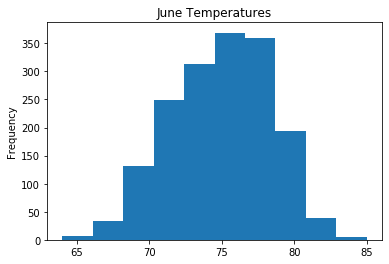

In [377]:
# Plot histogram for June temperatures
june_df["Temperature Observations"].plot.hist(title="June Temperatures")
plt.savefig("june_temps.png")

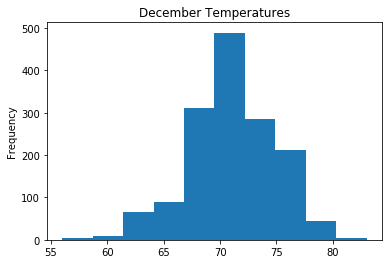

In [376]:
# Plot histogram for December temperatures
december_df["Temperature Observations"].plot.hist(title="December Temperatures")
plt.savefig("december_temps.png")

In [374]:
# Find all null values
june_df.isna().sum()

Date                          0
Precipitation               126
Temperature Observations      0
dtype: int64

## Challenge Analysis

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For this challenge, we looked into statistical data for the months of June and December. The dataset we sourced from included data points from 2010-01-01 to 2017-08-23. The first thing to note here is that our June data will have more values than December; we don't have data for December 2017. Also, we found that 126 of the precipitation values were null. While there are some differences in the statistical analysis, the overall variance is not too great. The average temperature difference between June and December is just under 4 degrees (74.9 and 71.0 for June and December, respectively). While December's max temperature value was 85 degrees (only two degrees higher than June's high of 83), that maximum value represents a single data point and is most likely an outlier.  As we can see from the histograms, the vast majority of June temperatures is between 70 and 80 degrees (perfect weather for ice cream). The greatest counts for December, however, are in the high 60s and low 70s.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One of the things to remember about this analysis is that it only covers two months out of the year. Further analysis to include the months of March and September is recommended to get a more comprehensive dataset. Or, even a month-by-month analysis using every month's data. Breaking down the statistical analysis by year would also give us an idea if there's any updward or downward trend in temperature and precipitation year to year. Another thing to remember is that this analysis represents data from a variety of locations. One specific locaiton may have a lower or higher average temperature than another, for example. To get a better overview of temperature and precipitation by location, its recommended we break down the above statistics and histograms by station location. 